## Optimization Attempt
#####drop 'STATUS' column, drop "Other" application type

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df2 = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df2.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df2 = application_df2.drop(columns=['EIN','NAME','STATUS','ASK_AMT'])
application_df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,1


In [3]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace2 = ['T10','T7','T8','T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace2:
    application_df2['APPLICATION_TYPE'] = application_df2['APPLICATION_TYPE'].replace(app,"Other")
    # application_df2 = application_df2[~application_df2['APPLICATION_TYPE'].isin(application_types_to_replace2)]

# Check to make sure binning was successful
application_df2['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace2 = [ 'C3000','C2100',
    'C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280',
    'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000',
    'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100',
    'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256',
    'C1370', 'C1236', 'C2190', 'C4200', 'C5200', 'C1248', 'C2600', 'C1580', 'C6100', 'C1820',
    'C1900', 'C2570', 'C1570', 'C3700', 'C2500', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170',
    'C4120', 'C8210', 'C4500', 'C1245', 'C2561', 'C2150']
# Replace in dataframe
for cls in classifications_to_replace2:
    application_df2['CLASSIFICATION'] = application_df2['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [5]:
# Convert categorical data to numeric with `pd.get_dummies`
columns_to_dummy2 = ['APPLICATION_TYPE', 'AFFILIATION','CLASSIFICATION','USE_CASE','INCOME_AMT','ORGANIZATION','SPECIAL_CONSIDERATIONS']
dummied_columns2 = pd.get_dummies(application_df2[columns_to_dummy2])
dummied_columns2.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [6]:
application_df2 = application_df2.drop(columns_to_dummy2, axis=1)
application_df2.head()

,IS_SUCCESSFUL
0,1
1,1
2,0
3,1
4,1


In [7]:
applications_combined_df2 = pd.concat([application_df2, dummied_columns2], axis=1)
applications_combined_df2.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [8]:
len(applications_combined_df2.columns)

37

In [9]:
# Split our preprocessed data into our features and target arrays
y2 = applications_combined_df2['IS_SUCCESSFUL']
X2 = applications_combined_df2.drop('IS_SUCCESSFUL', axis=1)

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=78, stratify=y2)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler.transform(X_train2)
X_test_scaled2 = X_scaler.transform(X_test2)

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=75, activation='sigmoid', input_dim=36))
nn3.add(tf.keras.layers.Dense(units=42, activation='sigmoid'))
nn3.add(tf.keras.layers.Dense(units=25, activation='sigmoid'))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                2775      
                                                                 
 dense_1 (Dense)             (None, 42)                3192      
                                                                 
 dense_2 (Dense)             (None, 25)                1075      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,068
Trainable params: 7,068
Non-trainable params: 0
_________________________________________________________________


In [12]:
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [13]:
train_model3 = nn3.fit(X_train_scaled2, y_train2, epochs=360)

Epoch 1/360
804/804 [==============================] - 4s 3ms/step - loss: 0.6065 - acc: 0.6972
Epoch 2/360
804/804 [==============================] - 2s 3ms/step - loss: 0.5813 - acc: 0.7217
Epoch 3/360
804/804 [==============================] - 3s 3ms/step - loss: 0.5768 - acc: 0.7230
Epoch 4/360
804/804 [==============================] - 2s 3ms/step - loss: 0.5714 - acc: 0.7246
Epoch 5/360
804/804 [==============================] - 2s 3ms/step - loss: 0.5677 - acc: 0.7255
Epoch 6/360
804/804 [==============================] - 1s 1ms/step - loss: 0.5656 - acc: 0.7258
Epoch 7/360
804/804 [==============================] - 1s 1ms/step - loss: 0.5641 - acc: 0.7265
Epoch 8/360
804/804 [==============================] - 1s 1ms/step - loss: 0.5626 - acc: 0.7272
Epoch 9/360
804/804 [==============================] - 1s 1ms/step - loss: 0.5618 - acc: 0.7271
Epoch 10/360
804/804 [==============================] - 1s 1ms/step - loss: 0.5608 - acc: 0.7269
Epoch 11/360
804/804 [=================

In [14]:
model_loss, model_accuracy = nn3.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5838 - acc: 0.7296 - 473ms/epoch - 2ms/step
Loss: 0.5837652683258057, Accuracy: 0.7295626997947693


In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
# nn3.save("/content/drive/My Drive/AlphabetSoupCharity_Optimization.h5")

##Neural Network Model Report

The purpose of this report is to detail the creation, functioning, and analysis of this nural network.

**Data Preprocessing:**


*   The variable that is the target for this model is the 'IS_SUCCESSFUL' column, as this column identifies whether or not a prior application was successful.
*   The variables that are the features for the model are as follows:
    *   'APPLICATION_TYPE'
    *   'AFFILIATION'
    *   'CLASSIFICATION'
    *   'USE_CASE'
    *   'INCOME_AMT'
    *   'SPECIAL_CONSIDERATIONS'
    *   'ORGANIZATION'

*   The variables that were removed from the input data because they are        neither targets nor features are as follows:
    *   'EIN'
    *   'NAME'
    *   'STATUS'
    *   'ASK_AMT'

**Compiling, Training, and Evaluating the Model:**

*   The number of neurons, layers, and activations functions I selected for my neural network model are as follows:

    *   Number of Neurons: 142
    *   Number of layers: 3
    *   Activation Function type: 'Sigmoid'
    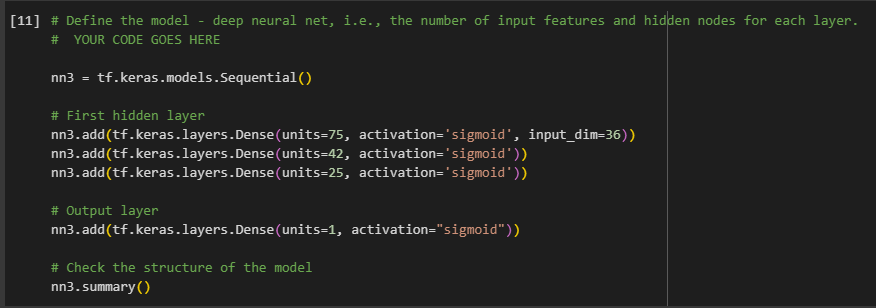
    

*   Unfortunately, I was not able to acheive my target model performance. The highest accuracy score that I was able to acheive at any time was 0.7385.

*   The steps I took in attempting to increase my model performance are as follows:

    *   Removed additional columns 'STATUS' and 'ASK_AMT'
    *   Removed additional 'APPLICCATION_TYPE's T10,T7, and T8
    *   Removed additional 'CLASSIFICATION' classes C3000 and C2100
    *   Changed the activation function type to 'Sigmoid' in all layers
    *   Adjusted the number of neurons in each layer
    *   Increased epochs

**Summary**

Overall, the results of the deep learning model were not satisfacory and unfortunately did not meet the intended target of .75 accuracy. Considering that this model is binary, a supervised machine learning model may be appropriate such as Support Vector Machine, as it may help to identify a trend that is not easily seen.